You have a grid of size n x 3 and you want to paint each cell of the grid with exactly one of the three colors: Red, Yellow, or Green while making sure that no two adjacent cells have the same color (i.e., no two cells that share vertical or horizontal sides have the same color).

Given n the number of rows of the grid, return the number of ways you can paint this grid. As the answer may grow large, the answer must be computed modulo 109 + 7.

 

Example 1:

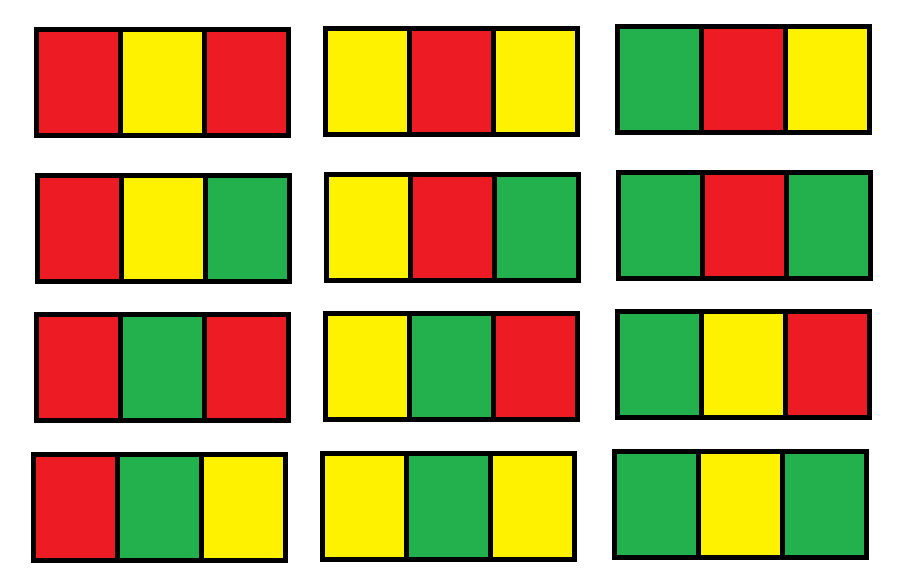

Input: n = 1
Output: 12
Explanation: There are 12 possible way to paint the grid as shown.

Example 2:

Input: n = 5000
Output: 30228214

 

Constraints:

    n == grid.length
    1 <= n <= 5000



In [ ]:
class Solution:
    def numOfWays(self, n: int) -> int:
        MOD = 10**9 + 7

        # Precompute all valid triplets
        row_combinations = set()
        for i in range(3):
            for j in range(3):
                for k in range(3):
                    if i != j and j != k:
                        row_combinations.add((i, j, k))
                        
        if n == 1:
            return len(row_combinations)

        # Precompute all possible transitions to the next row
        transitions = defaultdict(set)
        for current_row in row_combinations:
            for next_row in row_combinations:
                if not any(curr == nxt for curr, nxt in zip(current_row, next_row)):
                    transitions[current_row].add(next_row)

        # Fill counts for the first row
        current_row = {combination: 1 for combination in row_combinations}
        # Compute counts for all next rows
        for _ in range(1, n):
            next_row = defaultdict(int)
            for combination, cnt in current_row.items():
                for nxt in transitions[combination]:
                    next_row[nxt] = (next_row[nxt] + cnt) % MOD
            current_row = next_row
        return sum(current_row.values()) % MOD